<a href="https://colab.research.google.com/github/CienciaDatosUdea/002_EstudiantesAprendizajeEstadistico/blob/main/semestre2025-1/Laboratorios/Tarea_00_penguins.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


##**David Alejandro Vásquez Franco**

##**CC 1000921301**

# Problema: Dataset de pingüinos: Este problema es entregable

Carga el sigiuente dataset y responde las siguientes preguntas:

```python
import pandas as pd
import seaborn as sns

# Cargar el dataset
df = sns.load_dataset('penguins')
```
Estas preguntas los guiarán a realizar un análisis descriptivo del dataset y a realizar un test de hipótesis.

## Primera aproximación a los datos de forma general y su limpieza:

1. ¿Cuántas especies diferentes de pingüinos hay en el dataset? ¿Que caracteristicas de los pinguinos se dan para cada especie?
2. ¿Hay valores faltantes en las variables? Determine una estrategie de limpieza y apliquela.
3. ¿Cuál es la isla con mayor número de pingüinos en el dataset? ¿Hay un desbalance en número en el número de pinguinos por isla?
4. Repita la pregunta anterior observando las especies.

## Tendencias y visualizacion de las variables

5. ¿Cuál es la longitud media y la desviacion estandard del tamaño del pico de los pingüinos por especie?
6. ¿Qué pingüino tiene el pico más largo en el dataset y cuál es su especie?

7. ¿Como es la distribución de la masa corporal entre las especies de pingüinos?
8. Describa la distribucion con ayuda de la media, desviacion estandard
9. ¿Cuál es la diferencia en masa corporal promedio y desviacion estandard entre machos y hembras?

10. ¿Cuál es la media y la desviación estándar de la longitud de la aleta de los pingüinos por especie?
11. ¿Cuál es la longitud mínima y máxima de la aleta entre las tres especies de pingüinos?

12. ¿Cómo varía la longitud del pico entre las diferentes especies de pingüinos en las distintas islas?

13. ¿Cuál es la isla con la mayor variación en la longitud del pico entre las tres especies de pingüinos?


## Relación entre caracteristicas de los pingüinos

14. ¿Cuál es la relación entre la longitud del pico y la masa corporal de los pingüinos? ¿Cambia esa relación si se mira por especie? Utilice diagramas de dispersión para visualizarlos.

15. ¿Existe una correlación significativa entre la longitud del pico y la masa corporal en las diferentes especies de pingüinos?

16. ¿Cuál es la relación entre el sexo y la longitud de la aleta en los pingüinos por especie?



## Test de hipótesis

17. Escoja una de las tendencias que haya observado en la cual haya una correlación entre las variables y ahora con un test de hipótesis determine si esta correlación puede ser explicada por aleatoriedad. Para esta pregunta puede usar las relaciones del libro "Probabilidad y Estadistica" de Marques de Cantu sección 12.6 donde hay un ejemplo 12.8 que les guia como usar las expresiones y hacer las conclusiones.
















# **Solución**

In [49]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Cargar el dataset
df = sns.load_dataset('penguins')
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


## **1. ¿Cuántas especies diferentes de pingüinos hay en el dataset? ¿Que caracteristicas de los pinguinos se dan para cada especie?**

In [11]:
# Especies diferentes
species_list = df['species'].unique()
num_species = len(species_list)

# Características
carac = df.columns.tolist()

print(f"Hay {num_species} especies diferentes de pingüinos")
print("Las especies son:")
for i in species_list:
    print(f"- {i}")

print("\nLas características para cada pingüino son:")
for j in carac:
    print(f"- {j}")

Hay 3 especies diferentes de pingüinos
Las especies son:
- Adelie
- Chinstrap
- Gentoo

Las características para cada pingüino son:
- species
- island
- bill_length_mm
- bill_depth_mm
- flipper_length_mm
- body_mass_g
- sex


## **2. ¿Hay valores faltantes en las variables? Determine una estrategia de limpieza y apliquela.**

In [14]:
# Valores faltantes
print("Forma del dataset sin limpiar", df.shape)
print("Conteo de valores nulos por columna:")
print(df.isnull().sum())

# Limpieza
# Eliminar las filas que contengan al menos un valor nulo.
df_limpio = df.dropna().copy()

print("\nNuevo dataset limpio", df_limpio.shape)
print(df_limpio.isnull().sum())

Forma del dataset sin limpiar (344, 7)
Conteo de valores nulos por columna:
species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

Nuevo dataset limpio (333, 7)
species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64


## **3. ¿Cuál es la isla con mayor número de pingüinos en el dataset? ¿Hay un desbalance en número en el número de pinguinos por isla?**

In [19]:
# Número de pingüinos por isla
conteo_por_isla = df_limpio['island'].value_counts()

# Isla con el mayor número
isla_mayor_poblacion = conteo_por_isla.idxmax()

print("Conteo de pingüinos en cada isla:")
print(conteo_por_isla)
print(f"La isla con el mayor número de pingüinos es: {isla_mayor_poblacion}")
print("\nHay un desbalance notable. La isla Biscoe tiene más que Dream pero no mucho, pero el desbalance está con la isla Torgersen.")

Conteo de pingüinos en cada isla:
island
Biscoe       163
Dream        123
Torgersen     47
Name: count, dtype: int64
La isla con el mayor número de pingüinos es: Biscoe

Hay un desbalance notable. La isla Biscoe tiene más que Dream pero no mucho, pero el desbalance está con la isla Torgersen.


## **4. Repita la pregunta anterior observando las especies.**

In [20]:
# Agrupar por isla y especie
conteo_especies_isla = df_limpio.groupby(['island', 'species']).size().unstack(fill_value=0)

print("Conteo de pingüinos de cada especie en cada isla:")
print(conteo_especies_isla)

Conteo de pingüinos de cada especie en cada isla:
species    Adelie  Chinstrap  Gentoo
island                              
Biscoe         44          0     119
Dream          55         68       0
Torgersen      47          0       0


Se observa un desbalance aún más pronunciado. La especie Adelie es la única presente en las tres islas, mientras que los pingüinos Gentoo se encuentran únicamente en Biscoe y los Chinstrap habitan exclusivamente en la isla Dream.Siendo así Torgersen la única isla con una sola especie.

## **5. ¿Cuál es la longitud media y la desviacion estandar del tamaño del pico de los pingüinos por especie?**

In [21]:
# Calcular media y desviación estándar del largo del pico por especie
estadisticas_pico = df_limpio.groupby('species')['bill_length_mm'].agg(['mean', 'std']).round(2)

print("Largo del Pico (en mm) por Especie")
print("\nLongitud media y desviación estándar:")
print(estadisticas_pico)

Largo del Pico (en mm) por Especie

Longitud media y desviación estándar:
            mean   std
species               
Adelie     38.82  2.66
Chinstrap  48.83  3.34
Gentoo     47.57  3.11


## **6. ¿Qué pingüino tiene el pico más largo en el dataset y cuál es su especie?**

In [22]:
# Índice de la fila con el valor máximo
indice_pico_max = df_limpio['bill_length_mm'].idxmax()

# Fila completa
pinguino_pico_largo = df_limpio.loc[indice_pico_max]

print("Los datos del pingüino con el pico más largo son:")
print(pinguino_pico_largo)

Los datos del pingüino con el pico más largo son:
species              Gentoo
island               Biscoe
bill_length_mm         59.6
bill_depth_mm          17.0
flipper_length_mm     230.0
body_mass_g          6050.0
sex                    Male
Name: 253, dtype: object


## **7. ¿Como es la distribución de la masa corporal entre las especies de pingüinos?**

Text(0, 0.5, 'Masa Corporal (g)')

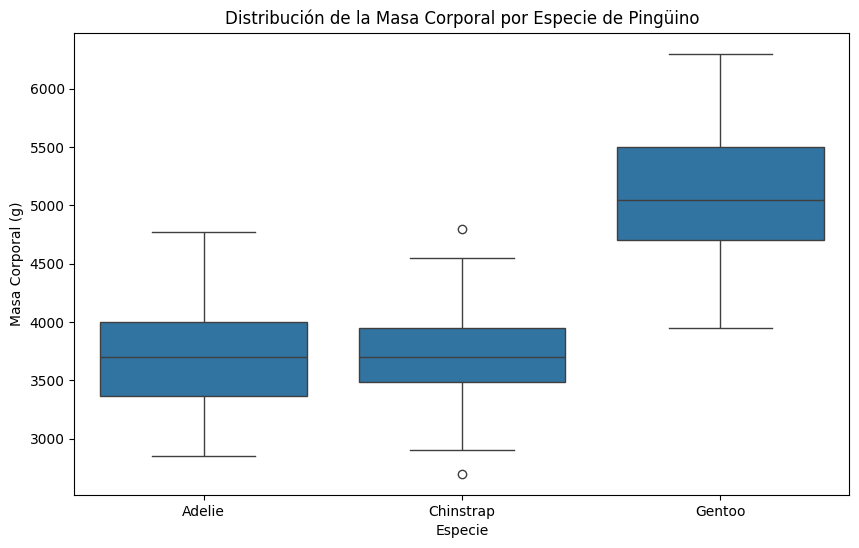

In [25]:
# Gráfico de cajas
plt.figure(figsize=(10, 6))
sns.boxplot(x='species', y='body_mass_g', data=df_limpio)
plt.title('Distribución de la Masa Corporal por Especie de Pingüino')
plt.xlabel('Especie')
plt.ylabel('Masa Corporal (g)')

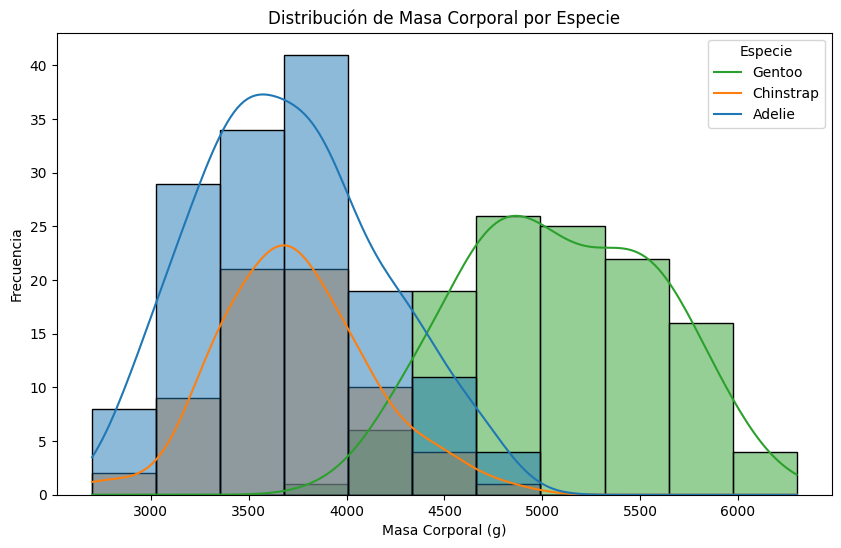

In [27]:
# Histogramas con curva de densidad
plt.figure(figsize=(10, 6))
sns.histplot(data=df_limpio, x='body_mass_g', hue='species', kde=True, alpha=0.5)
plt.title('Distribución de Masa Corporal por Especie')
plt.xlabel('Masa Corporal (g)')
plt.ylabel('Frecuencia')
plt.legend(title='Especie', labels=['Gentoo', 'Chinstrap', 'Adelie'])

## **8. Describa la distribucion con ayuda de la media, desviacion estandard**

In [28]:
# Media y desviación estándar de la masa corporal por especie
estadisticas_masa = df_limpio.groupby('species')['body_mass_g'].agg(['mean', 'std']).round(2)

print("Masa media y desviación estándar:")
print(estadisticas_masa)


Masa media y desviación estándar:
              mean     std
species                   
Adelie     3706.16  458.62
Chinstrap  3733.09  384.34
Gentoo     5092.44  501.48


La especie Gentoo tiene la masa corporal promedio más alta, con una media de 5092.44 g. Las especies Adelie y Chinstrap tienen una masa media muy similar, de 3706.16 g y 3733.09 g respectivamente. En cuanto a la variabilidad, los Chinstrap son el grupo más homogéneo en su masa (menor std), mientras que los Gentoo presentan la mayor dispersión en sus pesos.

Observando la forma de la distribución en el histograma, las tres especies tienden a una distribución normal.

## **9. ¿Cuál es la diferencia en masa corporal promedio y desviacion estandard entre machos y hembras?**

In [30]:
# Media y desviación estándar de la masa corporal por sexo
estadisticas_sexo = df_limpio.groupby('sex')['body_mass_g'].agg(['mean', 'std']).round(2)
diferencia_media = estadisticas_sexo.loc['Male', 'mean'] - estadisticas_sexo.loc['Female', 'mean']

print("Masa media y desviación estándar:")
print(estadisticas_sexo)
print(f"\nLa diferencia de masa promedio entre machos y hembras es: {diferencia_media:.2f} g")

Masa media y desviación estándar:
           mean     std
sex                    
Female  3862.27  666.17
Male    4545.68  787.63

La diferencia de masa promedio entre machos y hembras es: 683.41 g


En promedio, los machos son 683.41 gramos más pesados que las hembras. Además, la desviación estándar muestra que existe una mayor variabilidad en el peso de los machos en comparación con las hembras.

## **10. ¿Cuál es la media y la desviación estándar de la longitud de la aleta de los pingüinos por especie?**

In [32]:
# Media y desviación estándar de la longitud de la aleta por especie
estadisticas_aleta = df_limpio.groupby('species')['flipper_length_mm'].agg(['mean', 'std']).round(2)

print("Longitud media y desviación estándar (en mm):")
print(estadisticas_aleta)

Longitud media y desviación estándar (en mm):
             mean   std
species                
Adelie     190.10  6.52
Chinstrap  195.82  7.13
Gentoo     217.24  6.59


## **11. ¿Cuál es la longitud mínima y máxima de la aleta entre las tres especies de pingüinos?**

In [34]:
# min y max de la longitud de la aleta por especie
rango_aleta_especie = df_limpio.groupby('species')['flipper_length_mm'].agg(['min', 'max'])

# Calcular el min y max general
min_general = df_limpio['flipper_length_mm'].min()
max_general = df_limpio['flipper_length_mm'].max()

print("Longitud mínima y máxima por especie:")
print(rango_aleta_especie)
print(f"\nLa longitud mínima de aleta en todo el dataset es: {min_general} mm")
print(f"La longitud máxima de aleta en todo el dataset es: {max_general} mm")

Longitud mínima y máxima por especie:
             min    max
species                
Adelie     172.0  210.0
Chinstrap  178.0  212.0
Gentoo     203.0  231.0

La longitud mínima de aleta en todo el dataset es: 172.0 mm
La longitud máxima de aleta en todo el dataset es: 231.0 mm


## **12. ¿Cómo varía la longitud del pico entre las diferentes especies de pingüinos en las distintas islas?**

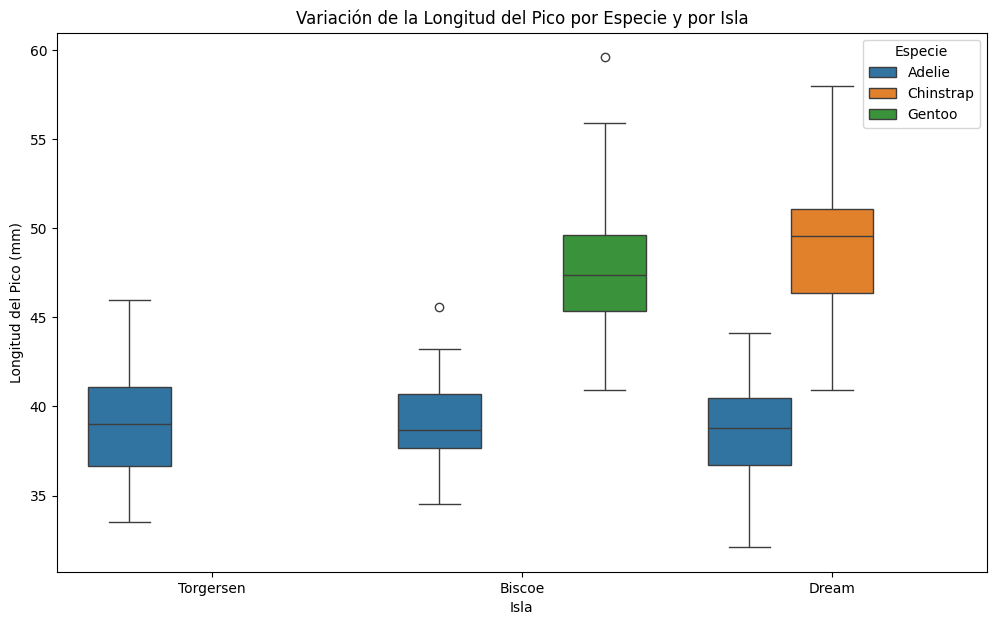

In [35]:
# Gráfico de cajas
plt.figure(figsize=(12, 7))
sns.boxplot(data=df_limpio, x='island', y='bill_length_mm', hue='species')
plt.title('Variación de la Longitud del Pico por Especie y por Isla')
plt.xlabel('Isla')
plt.ylabel('Longitud del Pico (mm)')
plt.legend(title='Especie')

In [36]:
# Agrupar por isla y especie
estadisticas_pico_detallado = df_limpio.groupby(['island', 'species'])['bill_length_mm'].describe().round(2)

print("Variación Numérica de la Longitud del Pico por Especie e Isla")
print(estadisticas_pico_detallado)

Variación Numérica de la Longitud del Pico por Especie e Isla
                     count   mean   std   min    25%    50%    75%   max
island    species                                                       
Biscoe    Adelie      44.0  38.97  2.48  34.5  37.68  38.70  40.70  45.6
          Gentoo     119.0  47.57  3.11  40.9  45.35  47.40  49.60  59.6
Dream     Adelie      55.0  38.52  2.48  32.1  36.70  38.80  40.45  44.1
          Chinstrap   68.0  48.83  3.34  40.9  46.35  49.55  51.08  58.0
Torgersen Adelie      47.0  39.04  3.03  33.5  36.65  39.00  41.10  46.0


## **13. ¿Cuál es la isla con la mayor variación en la longitud del pico entre las tres especies de pingüinos?**

In [37]:
# Desviación estándar de la longitud del pico por isla
variacion_por_isla = df_limpio.groupby('island')['bill_length_mm'].std()

# Isla con la máxima variación
isla_max_variacion = variacion_por_isla.idxmax()

print("Variación de la Longitud del Pico (Desviación Estándar) por Isla")
print(variacion_por_isla.round(2))
print(f"\nLa isla con la mayor variación en la longitud del pico es: {isla_max_variacion}")

Variación de la Longitud del Pico (Desviación Estándar) por Isla
island
Biscoe       4.83
Dream        5.95
Torgersen    3.03
Name: bill_length_mm, dtype: float64

La isla con la mayor variación en la longitud del pico es: Dream


## **14. ¿Cuál es la relación entre la longitud del pico y la masa corporal de los pingüinos? ¿Cambia esa relación si se mira por especie? Utilice diagramas de dispersión para visualizarlos.**

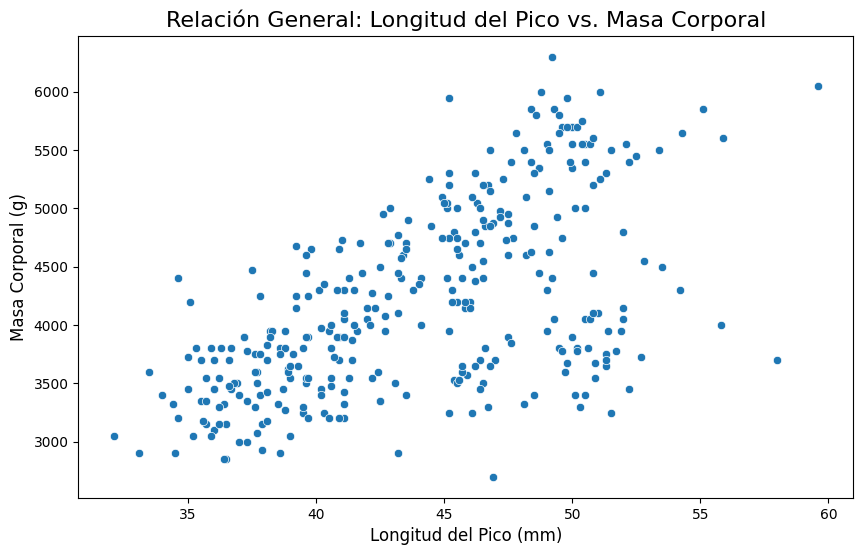

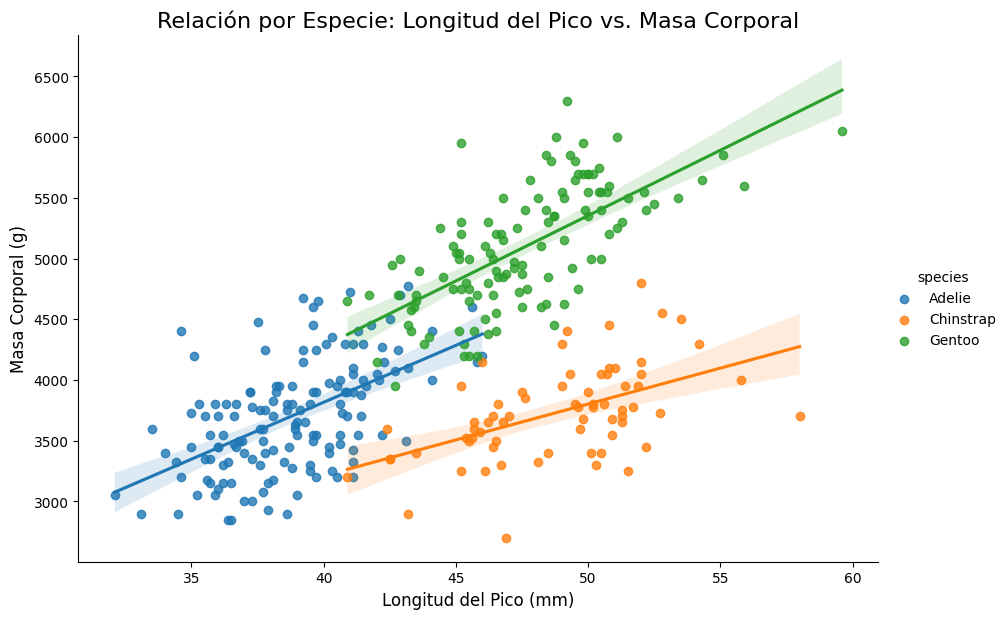

In [41]:
# Relación General
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_limpio, x='bill_length_mm', y='body_mass_g')
plt.title('Relación General: Longitud del Pico vs. Masa Corporal', fontsize=16)
plt.xlabel('Longitud del Pico (mm)', fontsize=12)
plt.ylabel('Masa Corporal (g)', fontsize=12)
plt.show()

# Relación por Especie
# Usamos lmplot que combina un scatterplot con una línea de regresión
sns.lmplot(data=df_limpio, x='bill_length_mm', y='body_mass_g', hue='species', height=6, aspect=1.5)
plt.title('Relación por Especie: Longitud del Pico vs. Masa Corporal', fontsize=16)
plt.xlabel('Longitud del Pico (mm)', fontsize=12)
plt.ylabel('Masa Corporal (g)', fontsize=12)
plt.show()

Se observa una correlación positiva general: a medida que aumenta el largo del pico, también tiende a aumentar la masa del pingüino. Pero cuando la relación se analiza por especie, se ve que en realidad existen tres cúmulos de datos claramente definidos y separados, uno para cada especie. Dentro de cada uno de estos grupos, la correlación positiva se mantiene, pero la verdadera conclusión es que la relación entre estas dos variables depende de la especie del pingüino.

## **15. ¿Existe una correlación significativa entre la longitud del pico y la masa corporal en las diferentes especies de pingüinos?**

In [44]:
# Coeficiente de correlación para cada especie
corr_adelie = df_limpio[df_limpio['species'] == 'Adelie']['bill_length_mm'].corr(df_limpio['body_mass_g'])
corr_chinstrap = df_limpio[df_limpio['species'] == 'Chinstrap']['bill_length_mm'].corr(df_limpio['body_mass_g'])
corr_gentoo = df_limpio[df_limpio['species'] == 'Gentoo']['bill_length_mm'].corr(df_limpio['body_mass_g'])

print("Coeficiente de Correlación de Pearson (r) por Especie")
print(f"Correlación para la especie Adelie: {corr_adelie:.4f}")
print(f"Correlación para la especie Chinstrap: {corr_chinstrap:.4f}")
print(f"Correlación para la especie Gentoo: {corr_gentoo:.4f}")

Coeficiente de Correlación de Pearson (r) por Especie
Correlación para la especie Adelie: 0.5443
Correlación para la especie Chinstrap: 0.5136
Correlación para la especie Gentoo: 0.6667


Existe una correlación positiva entre la longitud del pico y la masa corporal dentro de cada una de las tres especies. Estos números del coeficiente de correlación confirman de manera cuantitativa que para todas las especies existe la tendencia clara en la que los pingüinos con picos más largos también tienden a ser más pesados.

## **16. ¿Cuál es la relación entre el sexo y la longitud de la aleta en los pingüinos por especie?**

Estadísticas de Longitud de Aleta (mm) por Especie y Sexo
                  count    mean   std    min     25%    50%     75%    max
species   sex                                                             
Adelie    Female   73.0  187.79  5.60  172.0  185.00  188.0  191.00  202.0
          Male     73.0  192.41  6.60  178.0  189.00  193.0  197.00  210.0
Chinstrap Female   34.0  191.74  5.75  178.0  187.25  192.0  195.75  202.0
          Male     34.0  199.91  5.98  187.0  196.00  200.5  203.00  212.0
Gentoo    Female   58.0  212.71  3.90  203.0  210.00  212.0  215.00  222.0
          Male     61.0  221.54  5.67  208.0  218.00  221.0  225.00  231.0
 


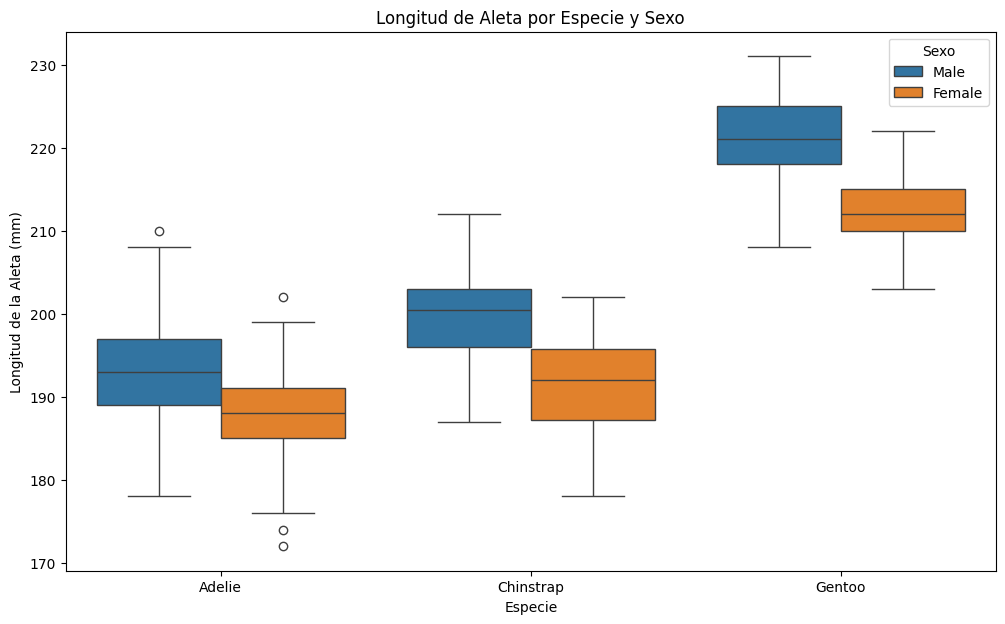

In [47]:
# Agrupar por especie y sexo para calcular las estadísticas
estadisticas_aleta_sexo = df_limpio.groupby(['species', 'sex'])['flipper_length_mm'].describe().round(2)

print("Estadísticas de Longitud de Aleta (mm) por Especie y Sexo")
print(estadisticas_aleta_sexo)
print(" ")

# Gráficas
plt.figure(figsize=(12, 7))
sns.boxplot(data=df_limpio, x='species', y='flipper_length_mm', hue='sex')

plt.title('Longitud de Aleta por Especie y Sexo')
plt.xlabel('Especie')
plt.ylabel('Longitud de la Aleta (mm)')
plt.legend(title='Sexo')
plt.show()

Tanto la tabla como el diagrama de cajas muestran un patrón claro, dentro de cada una de las tres especies, los machos tienen, en promedio, aletas más largas que las hembras.

## **17. Escoja una de las tendencias que haya observado en la cual haya una correlación entre las variables y ahora con un test de hipótesis determine si esta correlación puede ser explicada por aleatoriedad. Para esta pregunta puede usar las relaciones del libro "Probabilidad y Estadistica" de Marques de Cantu sección 12.6 donde hay un ejemplo 12.8 que les guia como usar las expresiones y hacer las conclusiones.**

Para realizar el test de hipótesis, se escogió la tendencia más observada, la correlación positiva entre la longitud del pico (`bill_length_mm`) y la masa corporal (`body_mass_g`). En este caso para la especie Gentoo.


- **Hipótesis Nula $(H_0)$:** No existe una correlación lineal entre la longitud del pico y la masa corporal en la población de pingüinos Gentoo. $(ρ=0)$


- **Hipótesis Alternativa $(H_1)$:** Sí existe una correlación lineal entre la longitud del pico y la masa corporal. $(ρ≠0)$

In [48]:
from scipy.stats import t

# Filtramos los datos para quedarnos solo con la especie Gentoo
df_gentoo = df_limpio[df_limpio['species'] == 'Gentoo']

# Extraemos las dos variables de interés
longitud_pico = df_gentoo['bill_length_mm']
masa_corporal = df_gentoo['body_mass_g']

# Calculamos n (número de observaciones)
n = len(df_gentoo)

# Coeficiente de correlación de Pearson (r)
r = longitud_pico.corr(masa_corporal)

print("Datos para el Test de Hipótesis (Especie Gentoo)")
print(f"Número de observaciones (n): {n}")
print(f"Coeficiente de Correlación de Pearson (r): {r:.4f}")

Datos para el Test de Hipótesis (Especie Gentoo)
Número de observaciones (n): 119
Coeficiente de Correlación de Pearson (r): 0.6667


In [50]:
# Calcular el estadístico t
t_calculado = (r * np.sqrt(n - 2)) / np.sqrt(1 - r**2)
grados_libertad = n - 2

print(f"Grados de libertad (g.l.): {grados_libertad}")
print(f"Estadístico t calculado: {t_calculado:.4f}")

Grados de libertad (g.l.): 117
Estadístico t calculado: 9.6764


In [56]:
# Valor crítico t para un test de dos colas con alpha=0.05 y g.l.= 117
# t.ppf(1 - alpha/2, df) da el valor t para la cola superior
t_critico = t.ppf(1 - 0.05/2, grados_libertad)

print("Nivel de significancia (α): 0.05")
print(f"Valor crítico t (para α/2 = 0.025, g.l. = {grados_libertad}): ± {t_critico:.4f}")

Nivel de significancia (α): 0.05
Valor crítico t (para α/2 = 0.025, g.l. = 117): ± 1.9804


Nivel de significancia $(α) = 0.05$. Este es un test de dos colas.

In [57]:
print("Test de Hipótesis")
if abs(t_calculado) > t_critico:
    print(f"Dado que |t_calculado| ({abs(t_calculado):.4f}) > t_crítico ({t_critico:.4f}), se rechaza la hipótesis nula (H_0).")
    print("Existe evidencia estadística significativa para afirmar que hay una correlación lineal entre la longitud del pico y la masa corporal en los pingüinos Gentoo.")
else:
    print(f"Dado que |t_calculado| ({abs(t_calculado):.4f}) <= t_crítico ({t_critico:.4f}), no se puede rechazar la hipótesis nula (H_0).")
    print("No hay evidencia estadística suficiente para afirmar que existe una correlación lineal entre la longitud del pico y la masa corporal en los pingüinos Gentoo.")

Test de Hipótesis
Dado que |t_calculado| (9.6764) > t_crítico (1.9804), se rechaza la hipótesis nula (H_0).
Existe evidencia estadística significativa para afirmar que hay una correlación lineal entre la longitud del pico y la masa corporal en los pingüinos Gentoo.


Dado que el valor absoluto de nuestro estadístico t calculado ($9.6764$) es significativamente mayor que el valor crítico t ($1.9804$) para un nivel de significancia de $α = 0.05$ y $117$ grados de libertad, rechazamos la hipótesis nula.

Esto significa que la correlación observada de $r = 0.6667$ entre la longitud del pico y la masa corporal en la especie Gentoo es estadísticamente significativa y no puede ser explicada por pura aleatoriedad. Existe una relación lineal real y positiva entre estas dos variables para esta especie.